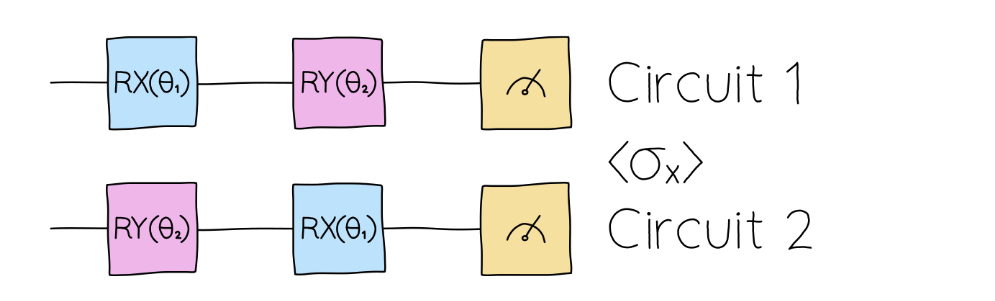

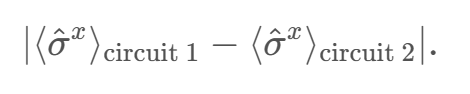

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit1(angles):
    """
    A Qnode implementing the circuit shown in the top part of the image

    Args:
        angles (np.ndarray(float)): A list [theta_1, theta_2] of angle
        parameters for the RX and RY gates respectively
    
    Returns: 
        (np.tensor): The expectation value of the PauliX observable
    """


    # Put your code here #
    qml.RX(angles[0], 0)
    qml.RY(angles[1], 0)

    # Return the expectation value
    return qml.expval(qml.PauliX(0))


@qml.qnode(dev)
def circuit2(angles):
    """
    A Qnode implementing the circuit shown in the bottom part of the image

    Args:
        angles (np.ndarray(float)): A list [theta_1, theta_2] of angle
        parameters for the RX and RY gates respectively
    
    Returns: 
        (np.tensor): The expectation value of the PauliX observable
    """


    # Put your code here #
    qml.RY(angles[1], 0)
    qml.RX(angles[0], 0)

    # Return the expectation value
    return qml.expval(qml.PauliX(0))


def compare_circuits(angles):
    """
    Given two angles, compare two circuit outputs that have their order of
    operations flipped: RX then RY VERSUS RY then RX.

    Args:
        angles (np.ndarray(float)): An array of two angles [theta_1, theta_2]

    Returns:
        (float): The absolute value of the difference between the expectation
        values of the circuits.
    """


    # Put your code here #
    res_1 = circuit1(angles)
    res_2 = circuit2(angles)
    return np.abs(res_1 - res_2)
    # Return the required difference in expectation values


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = compare_circuits(ins)

    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.isclose(solution_output, expected_output, rtol=1e-4)


# These are the public test cases
test_cases = [
    ('[3.79894785, 0.71678115]', '1.177019'),
    ('[5.88344281, 0.30672784]', '0.023805')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[3.79894785, 0.71678115]'...
Correct!
Running test case 1 with input '[5.88344281, 0.30672784]'...
Correct!
